In [ ]:
!pip install researchpy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from statistics import mean, stdev
from pylab import rcParams


sns.set()
plt.set_cmap('tab10')

<Figure size 432x288 with 0 Axes>

In [ ]:
# sklearn_results = pd.read_csv('./drive/MyDrive/compsci/sklearn_results.csv')
# cnn_results = pd.read_csv('./drive/MyDrive/compsci/cnn_results.csv')
# cnn_results = cnn_results.transpose()
# lstm_results = pd.read_csv('./drive/MyDrive/compsci/lstm_results.csv')
# lstm_results = lstm_results.transpose()

sklearn_results = pd.read_csv('./drive/MyDrive/compsci/leave_patients_results/sklearn_results.csv')
cnn_results = pd.read_csv('./drive/MyDrive/compsci/leave_patients_results/cnn_results.csv')
cnn_results = cnn_results.transpose()
lstm_results = pd.read_csv('./drive/MyDrive/compsci/leave_patients_results/lstm_results.csv')
lstm_results = lstm_results.transpose()

crossval_results = pd.read_csv('./drive/MyDrive/compsci/metric_results/crossval_results.csv')

In [ ]:
sklearn_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']
cnn_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']
lstm_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']

crossval_results.columns = ['Model','Acc_Mean','Acc_Std','Pre_Mean','Pre_Std','Rec_Mean','Rec_Std','F1_Mean','F1_Std']

In [ ]:
frames = [sklearn_results,lstm_results,cnn_results]
all_results = pd.concat(frames, ignore_index=True)
all_results = all_results.drop(columns=['Conf Matrice'])
print(all_results)
print('')

all_cv_results = crossval_results
print(all_cv_results.to_string())

   Model Accuracy Precision Recall F1score
0    GBC    0.884     0.955  0.884    0.91
1    ADA    0.248     0.811  0.248   0.336
2    RFC    0.901     0.963  0.901   0.925
3     NB    0.407     0.862  0.407   0.492
4  NNMLP    0.937     0.967  0.937   0.948
5    SVC    0.929     0.963  0.929   0.941
6   LSTM    0.981      0.99  0.981   0.985
7    CNN    0.987     0.991  0.987   0.988

   Model  Acc_Mean  Acc_Std  Pre_Mean  Pre_Std  Rec_Mean  Rec_Std  F1_Mean  F1_Std
0    ADA     0.498    0.231     0.781    0.027     0.498    0.231    0.533   0.246
1    RFC     0.911    0.005     0.951    0.001     0.911    0.005    0.925   0.003
2     NB     0.397    0.005     0.839    0.004     0.397    0.005    0.473   0.005
3  NNMLP     0.944    0.007     0.967    0.002     0.944    0.007    0.952   0.005
4    SVC     0.947    0.004     0.971    0.002     0.947    0.004    0.956   0.003
5   LSTM     0.941    0.011     0.969    0.004     0.941    0.011    0.951   0.009
6    CNN     0.949    0.011    

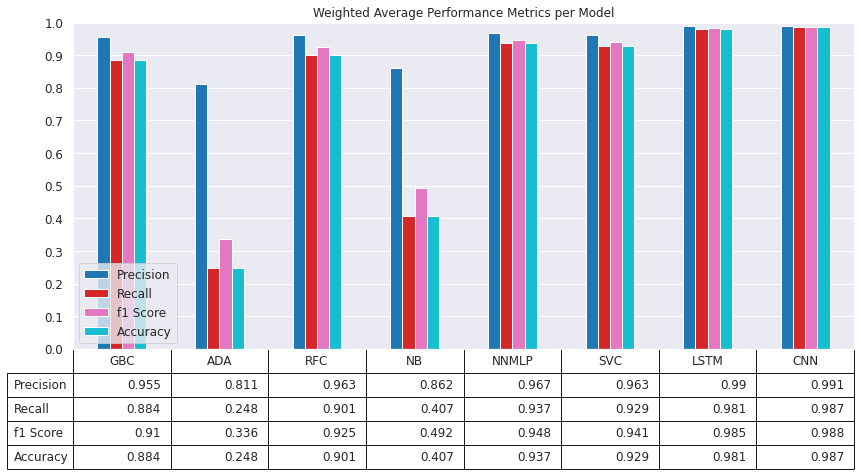

In [ ]:
accuracy =  round(all_results['Accuracy'].astype(float),3).to_numpy()
precision = round(all_results['Precision'].astype(float),3).to_numpy()
recall =    round(all_results['Recall'].astype(float),3).to_numpy()
f1_score =  round(all_results['F1score'].astype(float),3).to_numpy()
index = all_results['Model']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df_res = pd.DataFrame({'Precision':precision,
                   'Recall':recall,
                   'f1 Score':f1_score,
                   'Accuracy':accuracy
                  },
                  index=index)
ax = df_res.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            table=True,
            title=('Weighted Average Performance Metrics per Model'),
            colormap='tab10')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],["Precision", "Recall", "f1 Score", 'Accuracy'], loc=3, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

In [ ]:
import researchpy as rp
rp.summary_cont(df_res)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Precision,8.0,0.9378,0.0652,0.0231,0.8832,0.9923
1,Recall,8.0,0.7843,0.2872,0.1016,0.5441,1.0244
2,f1 Score,8.0,0.8156,0.2528,0.0894,0.6043,1.0270
3,Accuracy,8.0,0.7843,0.2872,0.1016,0.5441,1.0244


In [ ]:
stack_df = df_res.stack().reset_index()
stack_df = stack_df.rename(columns={'level_0': 'models',
                                    'level_1': 'metric',
                                    0:'score'},)
display(stack_df)

,Model,metric,score
0,GBC,Precision,0.955
1,GBC,Recall,0.884
2,GBC,f1 Score,0.910
3,GBC,Accuracy,0.884
4,ADA,Precision,0.811
5,ADA,Recall,0.248
6,ADA,f1 Score,0.336
7,ADA,Accuracy,0.248
8,RFC,Precision,0.963
9,RFC,Recall,0.901


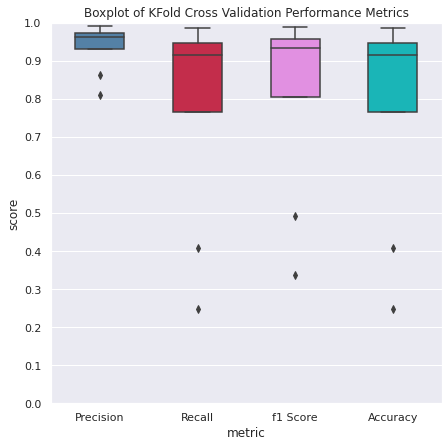

In [ ]:
plt.figure(figsize=(7,7))
mypal=('#4682B4','#DC143C','#EE82EE','#00CED1')
ax = sns.boxplot(y=stack_df["score"], x=stack_df["metric"],width=0.5, palette=mypal)
ax.set_title('Boxplot of KFold Cross Validation Performance Metrics')
ax.set_ylim(0.0,1.0)
ax.set_yticks(ticks=ticks,minor=False)

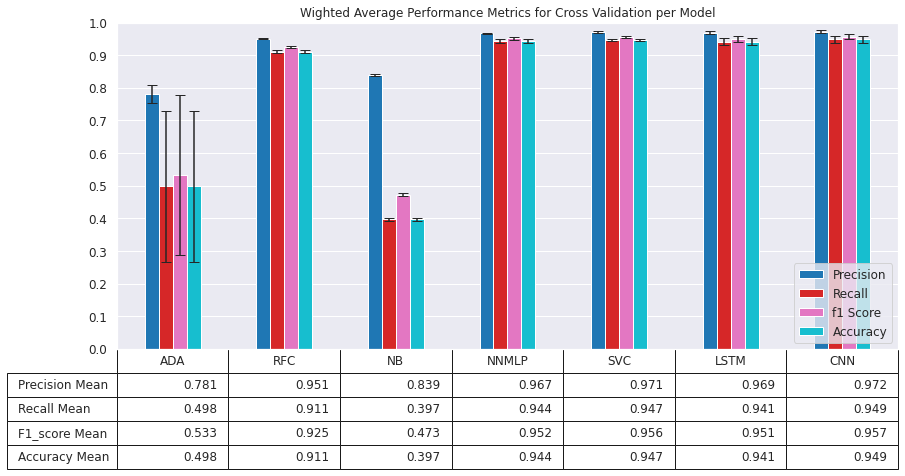

In [ ]:
accuracyM =  round(all_cv_results['Acc_Mean'].astype(float),3).to_numpy()
accuracyS =  round(all_cv_results['Acc_Std'].astype(float),3).to_numpy()

precisionM = round(all_cv_results['Pre_Mean'].astype(float),3).to_numpy()
precisionS = round(all_cv_results['Pre_Std'].astype(float),3).to_numpy()

recallM =    round(all_cv_results['Rec_Mean'].astype(float),3).to_numpy()
recallS =    round(all_cv_results['Rec_Std'].astype(float),3).to_numpy()

f1_scoreM =  round(all_cv_results['F1_Mean'].astype(float),3).to_numpy()
f1_scoreS =  round(all_cv_results['F1_Std'].astype(float),3).to_numpy()

index = all_cv_results['Model']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df_cv = pd.DataFrame({'Precision Mean':precisionM,
                       'Recall Mean':recallM,
                       'F1_score Mean':f1_scoreM,
                       'Accuracy Mean':accuracyM,
                      # 'Precision Std':precisionS,
                      # 'Recall Std':recallS,                   
                      # 'F1_score Std':f1_scoreS,                   
                      # 'Accuracy Std':accuracyS
                       },index=index)

error = [precisionS,recallS,f1_scoreS,accuracyS]

ax = df_cv.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            yerr=error,
            capsize=5,
            table=True,
            title=('Wighted Average Performance Metrics for Cross Validation per Model'),
            colormap='tab10')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],["Precision", "Recall", "f1 Score", 'Accuracy'], loc=4, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

In [ ]:
import researchpy as rp
rp.summary_cont(df_cv)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Precision Mean,7.0,0.9214,0.0783,0.0296,0.8491,0.9938
1,Recall Mean,7.0,0.7981,0.2416,0.0913,0.5747,1.0216
2,F1_score Mean,7.0,0.8210,0.2182,0.0825,0.6192,1.0228
3,Accuracy Mean,7.0,0.7981,0.2416,0.0913,0.5747,1.0216


In [ ]:
stack_df = df_cv.stack().reset_index()
stack_df = stack_df.rename(columns={'level_0': 'models',
                                    'level_1': 'metric',
                                    0:'score'},)
display(stack_df)

,Model,metric,score
0,ADA,Precision Mean,0.781
1,ADA,Recall Mean,0.498
2,ADA,F1_score Mean,0.533
3,ADA,Accuracy Mean,0.498
4,RFC,Precision Mean,0.951
5,RFC,Recall Mean,0.911
6,RFC,F1_score Mean,0.925
7,RFC,Accuracy Mean,0.911
8,NB,Precision Mean,0.839
9,NB,Recall Mean,0.397


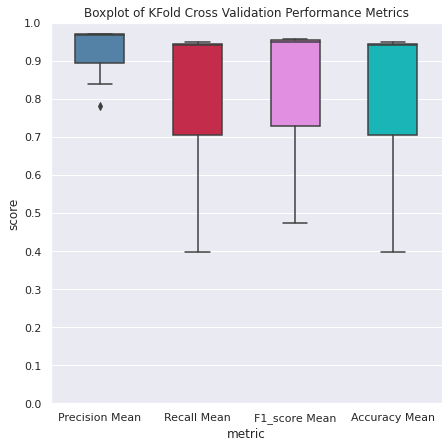

In [ ]:
plt.figure(figsize=(7,7))
mypal=('#4682B4','#DC143C','#EE82EE','#00CED1')
ax = sns.boxplot(y=stack_df["score"], x=stack_df["metric"],width=0.5, palette=mypal)
ax.set_title('Boxplot of KFold Cross Validation Performance Metrics')
ax.set_ylim(0.0,1.0)
ax.set_yticks(ticks=ticks,minor=False)

In [ ]:
import numpy as np
import scipy.stats as stats
# to check
# Confidence interval
confidence_level = 0.95
# If juste samples (not mean) the dof is 
mean_list, std_list, ci_list = [], [], []
for col_name  in df_cv:
    col_values = df_cv[col_name].values
    sample_size = len(col_values)
    degrees_freedom = sample_size - 1
    sample_mean = np.mean(col_values)
    # Standard error of the mean (SEM) = sigma / sqrt(n)
    sample_standard_error = stats.sem(col_values)
    print('sample_standard_error s^2=', sample_standard_error,
         'or s/np.sqrt(n_t)', np.std(col_values)/np.sqrt(sample_size),  np.std(col_values))
    confidence_interval = stats.t.interval(alpha=confidence_level,
                                           df=degrees_freedom,
                                           loc=sample_mean,
                                           scale=sample_standard_error)
    std_list.append(sample_standard_error)
    ci_list.append(confidence_interval)
    mean_list.append(sample_mean)
    
CI_df = pd.DataFrame([df_cv.columns.values, mean_list, std_list,  ci_list]).transpose()
CI_df.columns = ['metric',
                 'mean',
                 'std error',
                 'CI']
CI_df.loc[:,'CI'] =  CI_df.loc[:,'CI'].map(lambda x: (x[0].round(2), x[1].round(2)))
CI_df = CI_df.sort_values(by=['mean'])
display(CI_df)

sample_standard_error s^2= 0.029577869093902857 or s/np.sqrt(n_t) 0.02738378571557661 0.07245068695889863
sample_standard_error s^2= 0.09133101193732934 or s/np.sqrt(n_t) 0.08455608658414633 0.22371437693849622
sample_standard_error s^2= 0.08246875310137311 or s/np.sqrt(n_t) 0.07635122922443116 0.20200636482193185
sample_standard_error s^2= 0.09133101193732934 or s/np.sqrt(n_t) 0.08455608658414633 0.22371437693849622


,metric,mean,std error,CI
1,Recall Mean,0.798143,0.091331,"(0.57, 1.02)"
3,Accuracy Mean,0.798143,0.091331,"(0.57, 1.02)"
2,F1_score Mean,0.821,0.0824688,"(0.62, 1.02)"
0,Precision Mean,0.921429,0.0295779,"(0.85, 0.99)"


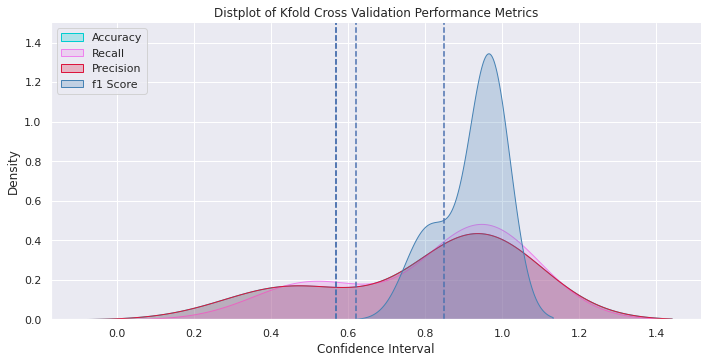

In [ ]:
mypal1=('#4682B4','#DC143C','#EE82EE','#00CED1')
graph = sns.displot(stack_df, x='score', hue='metric', kind="kde", fill=True,height=5,aspect=2,legend=False,palette=mypal1)
plt.title('Distplot of Kfold Cross Validation Performance Metrics')
plt.ylim(0,1.5)
plt.xlabel('Confidence Interval')
graph.ax.legend(labels=['Accuracy','Recall','Precision','f1 Score'],loc=2)
for CI in CI_df['CI'].values:
    plt.axvline(CI[0],  linestyle='--')
plt.show()

In [ ]:
ADA_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/ADA_acc.csv') 
ADA_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/ADA_pre.csv') 
ADA_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/ADA_rec.csv') 
ADA_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/ADA_f1s.csv') 

RFC_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/RFC_acc.csv') 
RFC_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/RFC_pre.csv') 
RFC_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/RFC_rec.csv') 
RFC_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/RFC_f1s.csv') 

NB_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/NB_acc.csv') 
NB_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/NB_pre.csv') 
NB_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/NB_rec.csv') 
NB_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/NB_f1s.csv') 

NNMLP_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/NNMLP_acc.csv') 
NNMLP_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/NNMLP_pre.csv') 
NNMLP_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/NNMLP_rec.csv') 
NNMLP_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/NNMLP_f1s.csv') 

SVC_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/SVC_acc.csv') 
SVC_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/SVC_pre.csv') 
SVC_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/SVC_rec.csv') 
SVC_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/SVC_f1s.csv') 

LSTM_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/LSTM_acc.csv') 
LSTM_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/LSTM_pre.csv') 
LSTM_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/LSTM_rec.csv') 
LSTM_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/LSTM_f1s.csv') 

CNN_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/CNN_acc.csv') 
CNN_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/CNN_pre.csv') 
CNN_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/CNN_rec.csv') 
CNN_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/CNN_f1s.csv') 

In [ ]:
from scipy.stats import *
norm_data = [ADA_acc,ADA_pre,ADA_rec,ADA_f1s,
             RFC_acc,RFC_pre,RFC_rec,RFC_f1s,
             NB_acc,NB_pre,NB_rec,NB_f1s,
             NNMLP_acc,NNMLP_pre,NNMLP_rec,NNMLP_f1s,
             SVC_acc,SVC_pre,SVC_rec,SVC_f1s,
             LSTM_acc,LSTM_pre,LSTM_rec,LSTM_f1s,
             CNN_acc,CNN_pre,CNN_rec,CNN_f1s]

for i in norm_data:
  print(shapiro(i))

(0.8342933058738708, 0.1168350800871849)
(0.7896983623504639, 0.04738374054431915)
(0.8342933058738708, 0.1168350800871849)
(0.7745583057403564, 0.03427823260426521)
(0.9240466356277466, 0.534972071647644)
(0.9136450886726379, 0.4608076214790344)
(0.9240466356277466, 0.534972071647644)
(0.913278341293335, 0.45831266045570374)
(0.7432104349136353, 0.017080264165997505)
(0.8628855347633362, 0.19928760826587677)
(0.7432104349136353, 0.017080264165997505)
(0.7475986480712891, 0.018869008868932724)
(0.910325288772583, 0.4385402202606201)
(0.9178488850593567, 0.4900048077106476)
(0.910325288772583, 0.4385402202606201)
(0.8958789706230164, 0.3501444458961487)
(0.996569812297821, 0.9991128444671631)
(0.8934788107872009, 0.33681821823120117)
(0.996569812297821, 0.9991128444671631)
(0.99601149559021, 0.9987273812294006)
(0.9391205906867981, 0.6521212458610535)
(0.9695006608963013, 0.8890636563301086)
(0.9391205906867981, 0.6521212458610535)
(0.928082287311554, 0.565375804901123)
(0.9305141568183

In [ ]:
from scipy.stats import *

# Perform one-way ANOVA.

f_acc_stat, f_acc_p = f_oneway(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc)
f_pre_stat, f_pre_p = f_oneway(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre)
f_rec_stat, f_rec_p = f_oneway(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec)
f_f1s_stat, f_f1s_p = f_oneway(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s)

print('Accuracy: ', f_oneway(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc))
print('Precision: ', f_oneway(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre))
print('Recall: ', f_oneway(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec))
print('F1Score: ', f_oneway(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s))

Accuracy:  F_onewayResult(statistic=array([45.75995738]), pvalue=array([3.90037494e-15]))
Precision:  F_onewayResult(statistic=array([336.41008571]), pvalue=array([1.97123215e-29]))
Recall:  F_onewayResult(statistic=array([45.75995738]), pvalue=array([3.90037494e-15]))
F1Score:  F_onewayResult(statistic=array([32.88577395]), pvalue=array([5.46406695e-13]))


In [ ]:
k_acc_stat, k_acc_p = kruskal(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc)
k_pre_stat, k_pre_p = kruskal(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre)
k_rec_stat, k_rec_p = kruskal(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec)
k_f1s_stat, k_f1s_p = kruskal(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s)

print('Accuracy: ', kruskal(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc))
print('Precision: ', kruskal(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre))
print('Recall: ', kruskal(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec))
print('F1Score: ', kruskal(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s))

Accuracy:  KruskalResult(statistic=33.31339977851607, pvalue=9.12571796123257e-06)
Precision:  KruskalResult(statistic=35.25802879291251, pvalue=3.840747105154426e-06)
Recall:  KruskalResult(statistic=33.31339977851607, pvalue=9.12571796123257e-06)
F1Score:  KruskalResult(statistic=33.353266888150614, pvalue=8.965756114395341e-06)


In [ ]:
!pip install scikit-posthocs

     |████████████████████████████████| 51kB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-cp37-none-any.whl size=37886 sha256=765bb46ea5f0a297f0e3100063f9010c6488a5616c677af78da048670eace1e9
  Stored in directory: /root/.cache/pip/wheels/00/0f/56/897c22820a48a74f50f1a85faaa4b133bb8865e8b094b596f5
Successfully built scikit-posthocs


In [ ]:
from scikit_posthocs import posthoc_wilcoxon

acc_data = [ADA_acc.to_numpy(),RFC_acc.to_numpy(),NB_acc.to_numpy(),NNMLP_acc.to_numpy(),SVC_acc.to_numpy(),LSTM_acc.to_numpy(),CNN_acc.to_numpy()]

pre_data = [ADA_pre.to_numpy(),RFC_pre.to_numpy(),NB_pre.to_numpy(),NNMLP_pre.to_numpy(),SVC_pre.to_numpy(),LSTM_pre.to_numpy(),CNN_pre.to_numpy()]

rec_data = [ADA_rec.to_numpy(),RFC_rec.to_numpy(),NB_rec.to_numpy(),NNMLP_rec.to_numpy(),SVC_rec.to_numpy(),LSTM_rec.to_numpy(),CNN_rec.to_numpy()]

f1s_data = [ADA_f1s.to_numpy(),RFC_f1s.to_numpy(),NB_f1s.to_numpy(),NNMLP_f1s.to_numpy(),SVC_f1s.to_numpy(),LSTM_f1s.to_numpy(),CNN_f1s.to_numpy()]

In [ ]:
acc_pair_wilcox = posthoc_wilcoxon(acc_data, p_adjust='bonferroni')
pre_pair_wilcox = posthoc_wilcoxon(pre_data, p_adjust='bonferroni')
rec_pair_wilcox = posthoc_wilcoxon(rec_data, p_adjust='bonferroni')
f1s_pair_wilcox = posthoc_wilcoxon(f1s_data, p_adjust='bonferroni')

print('Accuracy:\n',acc_pair_wilcox)
print('Precision:\n',pre_pair_wilcox)
print('Recall:\n',rec_pair_wilcox)
print('F1Score:\n',f1s_pair_wilcox)

Accuracy:
           1         2         3         4         5         6         7
1  1.000000  0.581865  1.000000  0.581865  0.581865  0.581865  0.581865
2  0.581865  1.000000  0.581865  0.581865  0.581865  0.581865  0.581865
3  1.000000  0.581865  1.000000  0.581865  0.572905  0.581865  0.581865
4  0.581865  0.581865  0.581865  1.000000  1.000000  1.000000  1.000000
5  0.581865  0.581865  0.572905  1.000000  1.000000  1.000000  1.000000
6  0.581865  0.581865  0.581865  1.000000  1.000000  1.000000  1.000000
7  0.581865  0.581865  0.581865  1.000000  1.000000  1.000000  1.000000
Precision:
           1         2         3         4         5         6         7
1  1.000000  0.581865  0.581865  0.581865  0.581865  0.581865  0.581865
2  0.581865  1.000000  0.581865  0.581865  0.581865  0.581865  0.581865
3  0.581865  0.581865  1.000000  0.581865  0.581865  0.581865  0.581865
4  0.581865  0.581865  0.581865  1.000000  0.581865  1.000000  1.000000
5  0.581865  0.581865  0.581865  0.581865

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


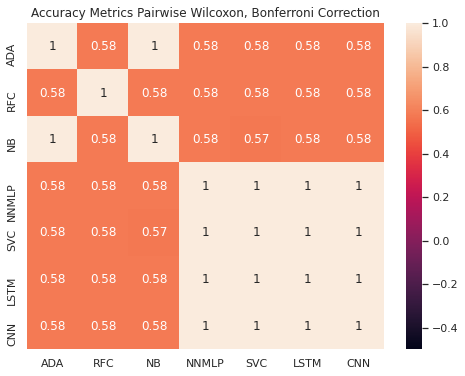

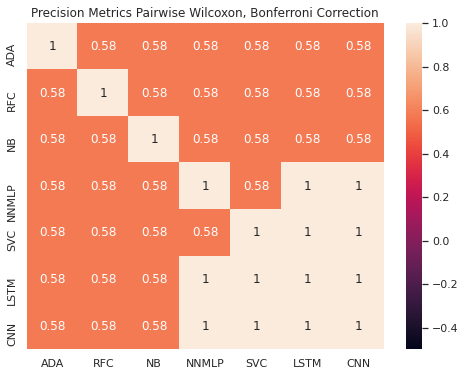

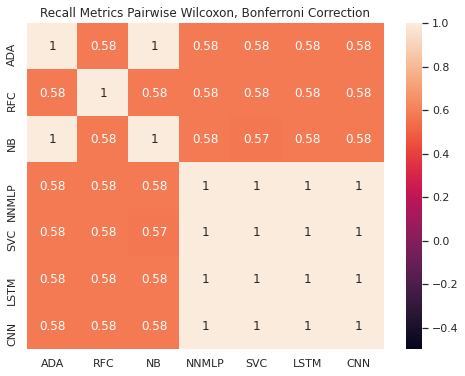

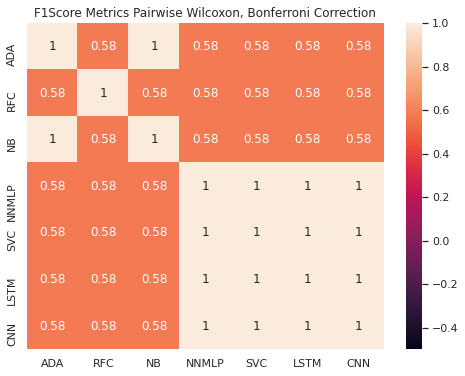

In [ ]:
categories = ['ADA','RFC','NB','NNMLP','SVC','LSTM','CNN']
rcParams['figure.figsize'] = 8,6
sns.heatmap(acc_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Accuracy Metrics Pairwise Wilcoxon, Bonferroni Correction')
plt.show()
sns.heatmap(pre_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Precision Metrics Pairwise Wilcoxon, Bonferroni Correction')
plt.show()
sns.heatmap(rec_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Recall Metrics Pairwise Wilcoxon, Bonferroni Correction')
plt.show()
sns.heatmap(f1s_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('F1Score Metrics Pairwise Wilcoxon, Bonferroni Correction')
plt.show()

In [ ]:
acc_pair_wilcox = posthoc_wilcoxon(acc_data)
pre_pair_wilcox = posthoc_wilcoxon(pre_data)
rec_pair_wilcox = posthoc_wilcoxon(rec_data)
f1s_pair_wilcox = posthoc_wilcoxon(f1s_data)

print('Accuracy:\n',acc_pair_wilcox)
print('Precision:\n',pre_pair_wilcox)
print('Recall:\n',rec_pair_wilcox)
print('F1Score:\n',f1s_pair_wilcox)

Accuracy:
           1         2         3         4         5         6         7
1  1.000000  0.027708  0.248864  0.027708  0.027708  0.027708  0.027708
2  0.027708  1.000000  0.027708  0.027708  0.027708  0.027708  0.027708
3  0.248864  0.027708  1.000000  0.027708  0.027281  0.027708  0.027708
4  0.027708  0.027708  0.027708  1.000000  0.600179  0.600179  0.172955
5  0.027708  0.027708  0.027281  0.600179  1.000000  0.248864  0.600179
6  0.027708  0.027708  0.027708  0.600179  0.248864  1.000000  0.115851
7  0.027708  0.027708  0.027708  0.172955  0.600179  0.115851  1.000000
Precision:
           1         2         3         4         5         6         7
1  1.000000  0.027708  0.027708  0.027708  0.027708  0.027708  0.027708
2  0.027708  1.000000  0.027708  0.027708  0.027708  0.027708  0.027708
3  0.027708  0.027708  1.000000  0.027708  0.027708  0.027708  0.027708
4  0.027708  0.027708  0.027708  1.000000  0.027708  0.345448  0.115851
5  0.027708  0.027708  0.027708  0.027708

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


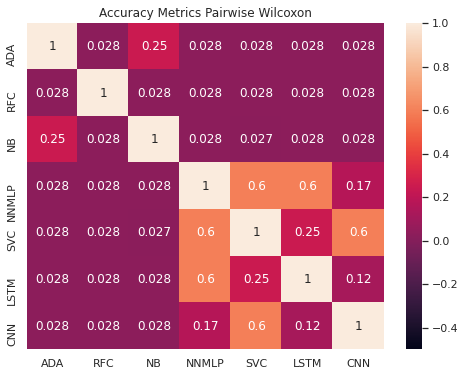

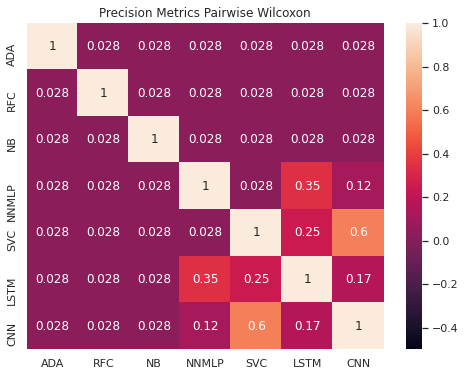

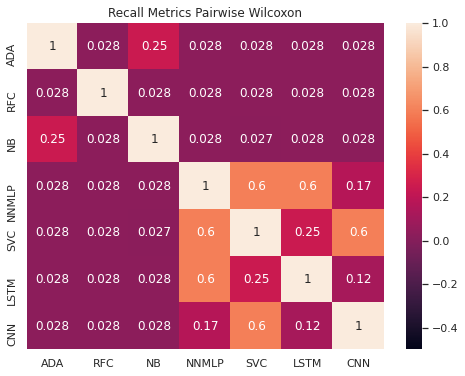

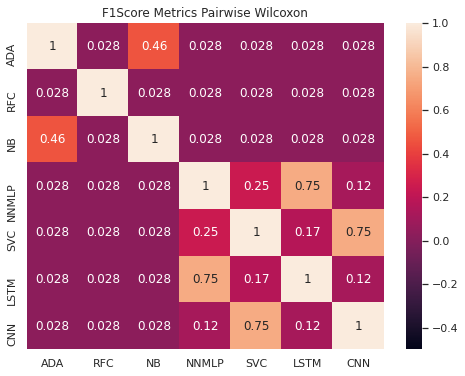

In [ ]:
categories = ['ADA','RFC','NB','NNMLP','SVC','LSTM','CNN']
rcParams['figure.figsize'] = 8,6
sns.heatmap(acc_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Accuracy Metrics Pairwise Wilcoxon')
plt.show()
sns.heatmap(pre_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Precision Metrics Pairwise Wilcoxon')
plt.show()
sns.heatmap(rec_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Recall Metrics Pairwise Wilcoxon')
plt.show()
sns.heatmap(f1s_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('F1Score Metrics Pairwise Wilcoxon')
plt.show()